# A simple visualization and modeling exercise

Read in the three files: clients.csv, loans.csv, payments.csv. These files are related by the following:
1. The clients file is the parent of the loans file. Each client can have multiple distinct loans. The client_id column links the two files
2. The loans file is the child of the clients file and the parent of the payments file. Each loan can have multiple distinct payments associated with it. The loan_id column links the two files.

With the above datasets, answer the following questions. Show the steps taken to produce your final answer.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data_folder = 'data'

clients = pd.read_csv(os.path.join(data_folder, 'clients.csv'))
loans = pd.read_csv(os.path.join(data_folder, "loans.csv"))
payments = pd.read_csv(os.path.join(data_folder, "payments.csv"))

First, we'll have a quick look at the structure of each dataframe to familiarize ourselves with the dataset

In [3]:
clients.head(5)

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [4]:
loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [5]:
payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


In [6]:
#converting date columns to datetime type
clients['joined'] = pd.to_datetime(clients['joined'])
loans['loan_start'] = pd.to_datetime(loans['loan_start'])
loans['loan_end'] = pd.to_datetime(loans['loan_end'])
payments['payment_date'] = pd.to_datetime(payments['payment_date'])

# Section 1 Questions

1. Give the 5 client IDs with the highest mean payment amount
2. How many unique loans have been given out to clients who joined prior to 2001?
3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

#### Q1: 5 client IDs with the highest mean payment amount

In [7]:
temp_df = pd.merge(clients, loans, on = "client_id")
merged_df = pd.merge(temp_df, payments, on = "loan_id")

merged_df.head(5)

,client_id,joined,income,credit_score,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,payment_amount,payment_date,missed
0,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2369,2002-05-31,1
1,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2439,2002-06-18,1
2,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2662,2002-06-29,0
3,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2268,2002-07-20,0
4,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2027,2002-07-31,1


In [8]:
ans_q1 = merged_df[["client_id","payment_amount"]].groupby("client_id").mean().sort_values(
    by = 'payment_amount', ascending = False)

print('Q1 answer (5 clients with the highest mean payment amount):', list(ans_q1.head().index))

Q1 answer (5 clients with the highest mean payment amount): [49545, 29841, 49624, 32885, 46109]


#### Q2:How many unique loans have been given out to clients who joined prior to 2001?

In [9]:
print('Q2 answer:', len(merged_df['loan_id'][merged_df['joined'] < '2001-1-1'].unique()))

Q2 answer: 49


#### Q3: What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

In [10]:
ans_q3 = merged_df[(merged_df['missed'] == 1) 
                                   & (merged_df['credit_score'] < 700)].groupby('client_id').size()

print('Q3 answer:', ans_q3.where(ans_q3 > 50).mean())

Q3 answer: 69.25


# Section 2 Questions

Create the following visualizations:
    
1. Create a histogram of the payment amounts. Briefly describe the distribution.
2. Produce a line plot the cumulative sum of the number of clients by year.
3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

#### Q1: Create a histogram of the payment amounts. Briefly describe the distribution.

Text(0.5, 0, 'Payment amount')

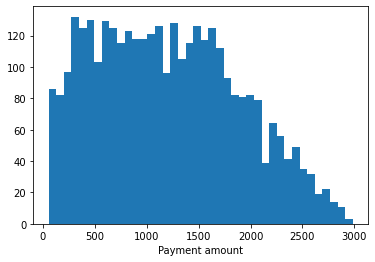

In [11]:
plt.hist(payments['payment_amount'], bins = 40)
plt.xlabel('Payment amount')

As we can see from the histogram above, the typical payment amount is in the 250-1750 range, with the extreme right part of the distribution almost reaching 3000

#### Q2: Produce a line plot the cumulative sum of the number of clients by year.
Note: the question is a bit ambiguous, the 'number of clients' could refer either to the number of clients who joined on a given year (clients['joined'] column), or to the active number of clients (e.g. receiving loans, making payments) during the year. We will assume the former.

In [12]:
clients.sort_values(by = 'joined', inplace = True)
#clients['joined_year'] = clients['joined'].apply(lambda x: x.year)
#clients['joined_year'] = clients['joined'].dt.year
ans_q2s2 = clients.groupby(clients['joined'].dt.year).size()

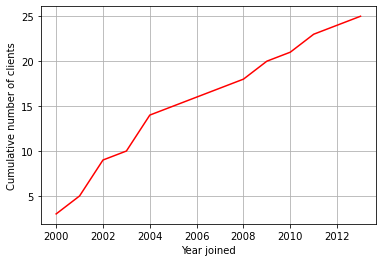

In [13]:
plt.plot(ans_q2s2.index, ans_q2s2.cumsum(), color = 'r')
plt.xlabel("Year joined")
plt.ylabel("Cumulative number of clients")
plt.grid(linestyle="-")

#### Q3: Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.
Note: the question is a bit ambiguous, the 'percentage of payments missed in december' may refer to:

* the number of payments missed in Dec / total number of payments in Dec
* the number of payments missed in Dec / number of payments missed throughout the whole year

###### We will calculate both, and refer to them as v1 and v2 respectively

Text(0.5, 1.0, '% of payments missed in December - Version1 \n (# of payments missed in Dec / total # of payments in Dec )')

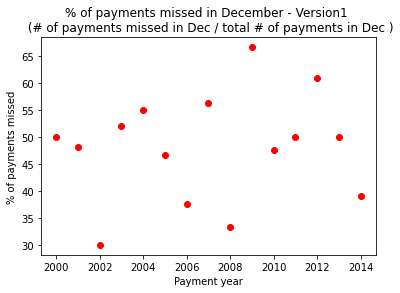

In [14]:
dec_subset = payments[payments['payment_date'].dt.month == 12]

temp = dec_subset.groupby([dec_subset['payment_date'].dt.year, dec_subset['missed']]).size()
ans_q3s2_v1 = 100 * temp[:,1] / (temp[:,0] + temp[:,1]) #in percents, "missed" / ("not missed" + missed")
plt.scatter(ans_q3s2_v1.index, ans_q3s2_v1, color = 'r')
plt.xlabel('Payment year')
plt.ylabel('% of payments missed')
plt.title('% of payments missed in December - Version1 \n \
(# of payments missed in Dec / total # of payments in Dec )')

In [15]:
dec_missed_subset = dec_subset[dec_subset['missed'] == 1]
all_missed_subset = payments[payments['missed'] == 1]
temp_all = all_missed_subset.groupby([all_missed_subset['payment_date'].dt.year]).size()
temp_dec = dec_missed_subset.groupby([dec_missed_subset['payment_date'].dt.year]).size()

ans_q3s2_v2 = 100 * temp_dec / temp_all # in percents

Text(0.5, 1.0, '% of payments missed in December - Version2 \n (# of payments missed in Dec / yearly # of payments missed )')

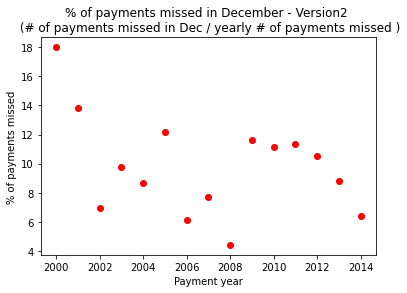

In [16]:
plt.scatter(ans_q3s2_v2.index, ans_q3s2_v2, color = 'r')
plt.xlabel('Payment year')
plt.ylabel('% of payments missed')
plt.title('% of payments missed in December - Version2 \n \
(# of payments missed in Dec / yearly # of payments missed )')

# Section 3 - Modelling

Create a model that will predict whether a person does or does not have diabetes. Use the diabetes.csv dataset. The target column in the dataset is "Outcome". Assume no features leak information about the target.

Your solution should include the below. You may use whichever python libraries you wish to complete the task:
1. Feature engineering
2. Model fitting and performance evaluation
3. A function that takes as arguments: a model, train data, test data, and returns the model's predictions on the test data
4. A function that takes a set of predictions and true values and that validates the predictions using appropriate metrics
5. Anything else you feel is necessary for modelling or improving the performance of your model


In [17]:
diabetes = pd.read_csv(os.path.join(data_folder, "test_diabetes.csv"), delimiter = ";")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [18]:
print('Number of rows:', len(diabetes))
print('\nColumn data types:\n', diabetes.dtypes)
diabetes.isna().sum()

Number of rows: 768

Column data types:
 Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                      object
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object


Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

"Insulin" and "Diabetes" columns are object types - they may require some data filtering and/or cleaning. We will also need to deal with null values, looks like a typical column has around 35-50 of them, or ~5% of total row count

In [19]:
diab_clean = diabetes.dropna()
print(len(diab_clean))

503


If we drop all null-containing rows, we still get to keep ~2/3 of the data. We'll consider it acceptable for this task for now; an alternative way of dealing with nulls would be to fill them with mean column values

In [20]:
diab_clean['Insulin'].unique()

array(['0', '94', '88', '543', 'Zero', '230', '96', '235', '115', '245',
       '54', '207', '70', '240', '82', '36', '23', '300', '342', '110',
       '128', '90', '140', '270', '71', '125', '176', '48', '64', '228',
       '76', '220', '152', '18', '135', '495', '37', '175', '51', '100',
       '99', '145', '168', '49', '92', '325', '63', '119', '155', '485',
       '53', '114', '156', '78', '55', '130', '58', '210', '318', '190',
       '280', '271', '120', '56', '32', '194', '680', '402', '258', '375',
       '150', '67', '45', '116', '122', '75', '40', '74', '360', '215',
       '184', '105', '180', '205', '148', '85', '68', '52', '255', '171',
       '108', '83', '167', '249', '293', '465', '89', '66', '158', '84',
       '72', '182', '81', '196', '415', '87', '310', '61', '474', '170',
       '277', '60', '50', '14', '237', '191', '328', '250', '265', '193',
       '86', '165', '326', '188', '225', '166', '44', '330', '185', '126',
       '41', '321', '144', '183', '91', '46', '

In [21]:
pd.options.mode.chained_assignment = None # we'll hide this unnecessary warning
diab_clean['Insulin'] = diab_clean['Insulin'].apply(lambda x: int(x) if x != 'Zero' else 0)

In [22]:
diab_clean['Insulin'].unique()

array([  0,  94,  88, 543, 230,  96, 235, 115, 245,  54, 207,  70, 240,
        82,  36,  23, 300, 342, 110, 128,  90, 140, 270,  71, 125, 176,
        48,  64, 228,  76, 220, 152,  18, 135, 495,  37, 175,  51, 100,
        99, 145, 168,  49,  92, 325,  63, 119, 155, 485,  53, 114, 156,
        78,  55, 130,  58, 210, 318, 190, 280, 271, 120,  56,  32, 194,
       680, 402, 258, 375, 150,  67,  45, 116, 122,  75,  40,  74, 360,
       215, 184, 105, 180, 205, 148,  85,  68,  52, 255, 171, 108,  83,
       167, 249, 293, 465,  89,  66, 158,  84,  72, 182,  81, 196, 415,
        87, 310,  61, 474, 170, 277,  60,  50,  14, 237, 191, 328, 250,
       265, 193,  86, 165, 326, 188, 225, 166,  44, 330, 185, 126,  41,
       321, 144, 183,  91,  46, 440, 159, 106,  77, 200, 231, 480, 335,
       160, 387,  22, 291, 392, 178,  79,  57, 510,  16, 112])

Similar data cleanup for the 'Outcome' column:

In [23]:
diab_clean['Outcome'].unique()

array(['0', '1', 'N', 'Y'], dtype=object)

In [24]:
temp_dict = {'0' : False, 'N' : False, '1': True, 'Y' : True}
diab_clean['Outcome'].replace(temp_dict, inplace = True)
diab_clean['Outcome'].unique()

array([False,  True])

In [25]:
print('Number of rows:', len(diab_clean))
print('\nColumn data types:\n', diab_clean.dtypes)
diab_clean.isna().sum()

Number of rows: 503

Column data types:
 Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                        bool
dtype: object


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now that we're done with basic data cleaning, we'll check dataset for nonsensical values and check distribution shapes

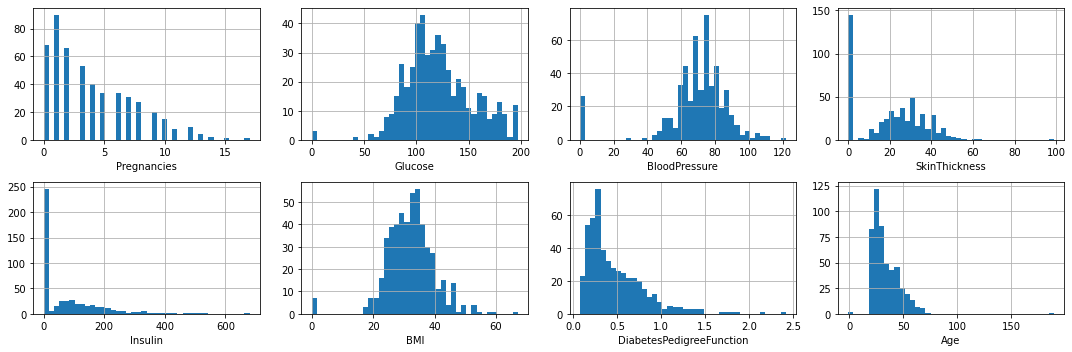

In [26]:
col_list = list(diab_clean)[:-1]

plt.figure(figsize=(15,5))

for ind, col in enumerate(col_list):
    plt.subplot(2, 4, ind + 1)
    plt.hist(diab_clean[col], bins = 40)
    plt.xlabel(col)
    plt.grid(linestyle = "-")
    plt.tight_layout()

In [27]:
diab_clean['SkinThickness'].unique()

array([29.,  0., 23., 32., 45., 47., 30., 41., 35., 26., 36., 11., 31.,
       37., 42., 25., 18., 24., 39., 27., 15., 21., 34., 10., 60., 20.,
       22., 54., 19., 40., 51., 33., 56., 14., 13., 28., 38., 12., 46.,
       44.,  7., 16., 50., 43., 48.,  8., 63., 17., 49., 99.])

In [28]:
diab_clean['Age'].unique()

array([ 31.,  32.,  21.,  26.,  53.,  30.,  34.,  57.,  27.,  50.,  41.,
        29.,  43.,  38.,  28.,  22.,  45.,  35.,  46.,  56.,  48.,  54.,
        40.,  25.,  24.,  58.,  42.,  44.,  39.,  36.,  23.,  37.,  -1.,
        62.,  33.,  55.,  47.,  60.,  52.,  66.,  61.,  49.,  51.,  63.,
        65.,  59.,  67.,  72., 190.,  70.])

Some additional filtering may be required considering we have entries with zero (or -1) values. We will consider to be invalid entries with age = -1 or above 130, as well as the ones with zero blood pressure, skin thickness, or BMI.

In [29]:
diab_clean = diab_clean[(diab_clean["Age"] >= 0) & 
                        (diab_clean["Age"] < 130) & 
                    (diab_clean["BloodPressure"] > 0) & 
                    (diab_clean["SkinThickness"] > 0) & 
                    (diab_clean["BMI"] > 0)]

Number of remaining rows: 354


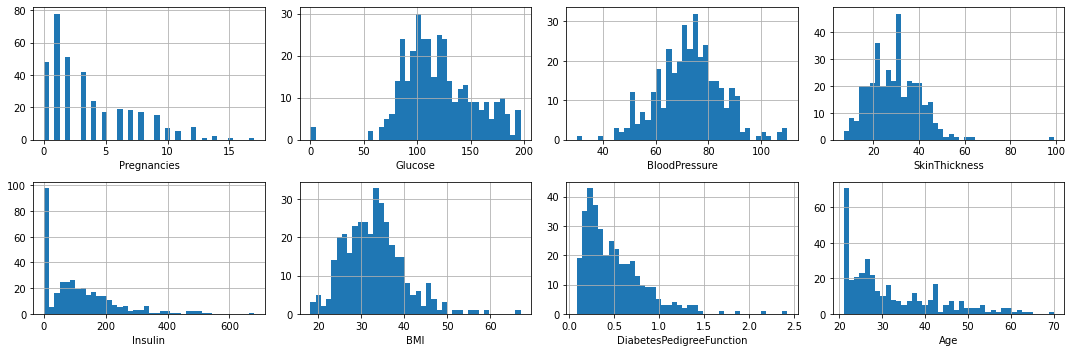

In [30]:
print('Number of remaining rows:', len(diab_clean))
col_list = list(diab_clean)[:-1]

plt.figure(figsize=(15,5))

for ind, col in enumerate(col_list):
    plt.subplot(2, 4, ind + 1)
    plt.hist(diab_clean[col], bins = 40)
    plt.xlabel(col)
    plt.grid(linestyle = "-")
    plt.tight_layout()

Now, we'll have a look at the distributions for both outcomes using our final filtered dataset, as well as check if our dataset is balanced (comparable number of positive and negative outcomes):

# of entries with Outcome = True: 122
# of entries with Outcome = True: 232
Feature distributions by Outcome (left = False, right = True)


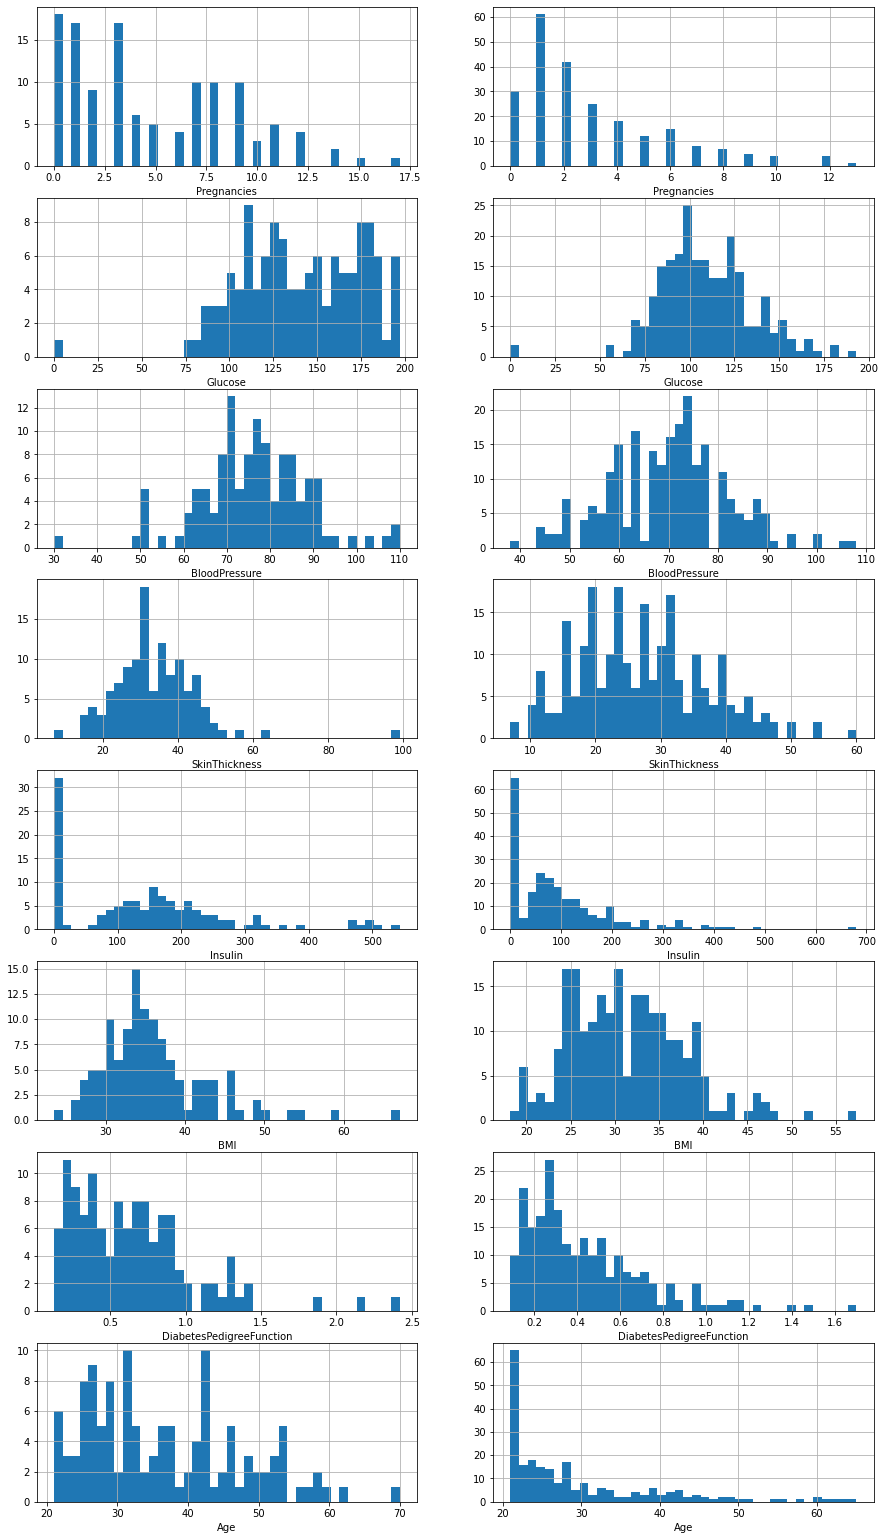

In [31]:
df_outcome_true = diab_clean[diab_clean['Outcome'] == True]
df_outcome_false = diab_clean[diab_clean['Outcome'] == False]

print('# of entries with Outcome = True:', len(df_outcome_true))
print('# of entries with Outcome = True:', len(df_outcome_false))

col_list = list(diab_clean)[:-1]
plt.figure(figsize=(15, 5*5.5))
print('Feature distributions by Outcome (left = False, right = True)')

for ind, col in enumerate(col_list):
    plt.subplot(len(col_list), 2, 2 * ind + 1)
    plt.hist(df_outcome_true[col], bins = 40)
    plt.xlabel(col)
    plt.grid(linestyle = "-")

    plt.subplot(len(col_list), 2, 2 * ind + 2)
    plt.hist(df_outcome_false[col], bins = 40)
    plt.xlabel(col)
    plt.grid(linestyle = "-")

Finally, a quick look at the correlations between different features:

In [32]:
corr = diab_clean.iloc[:,0:-1].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.117077,0.167659,0.062767,0.019589,-0.000009,0.034403,0.649928
Glucose,0.117077,1.000000,0.236385,0.237008,0.465349,0.274354,0.164613,0.276048
BloodPressure,0.167659,0.236385,1.000000,0.226780,0.090184,0.359614,0.048977,0.354674
SkinThickness,0.062767,0.237008,0.226780,1.000000,0.125952,0.632552,0.159956,0.175235
Insulin,0.019589,0.465349,0.090184,0.125952,1.000000,0.210710,0.111114,0.089817
BMI,-0.000009,0.274354,0.359614,0.632552,0.210710,1.000000,0.178674,0.102353
DiabetesPedigreeFunction,0.034403,0.164613,0.048977,0.159956,0.111114,0.178674,1.000000,0.140015
Age,0.649928,0.276048,0.354674,0.175235,0.089817,0.102353,0.140015,1.000000


The strongest correltations are between:
* BMI and skin thickness 
* Glucose and insulin
* age and pregnancies

While there is some potential collinearity concern, we'll keep all columns for now and proceed to the next stage - building and evaluating classifier models

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [34]:
Y = diab_clean['Outcome'].values
X = diab_clean[col_list]
X = (X - X.min()) / (X.max() - X.min())
X = X.values
print('Shape of the feature matrix:', X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Shape of the feature matrix: (354, 8)


In [35]:
def train_and_predict(model, X_train, X_test, y_train, y_test):
    """
    arguments: model, train data, test data
    output: model's predictions on the test data
    """
    model.fit(X_train , y_train)
    return model.predict(X_test)

def validate_predictions(true_labels, predicted_labels):
    print(classification_report(y_test, predicted_labels, target_names = ['Outcome = 0', 'Outcome = 1']))

model_list = [
    RandomForestClassifier(n_estimators = 100),
    LogisticRegression(multi_class = 'multinomial', max_iter = 100)]

model_names = ["Random forest", "Logistic regression"]

In [36]:
for ind, model in enumerate(model_list):
    print(model_names[ind].center(60, '-'))
    predictions = train_and_predict(model_list[ind], X_train, X_test, y_train, y_test)
    validate_predictions(y_test, predictions)

-----------------------Random forest------------------------
              precision    recall  f1-score   support

 Outcome = 0       0.81      0.83      0.82        52
 Outcome = 1       0.50      0.47      0.49        19

    accuracy                           0.73        71
   macro avg       0.66      0.65      0.65        71
weighted avg       0.73      0.73      0.73        71

--------------------Logistic regression---------------------
              precision    recall  f1-score   support

 Outcome = 0       0.78      0.88      0.83        52
 Outcome = 1       0.50      0.32      0.39        19

    accuracy                           0.73        71
   macro avg       0.64      0.60      0.61        71
weighted avg       0.70      0.73      0.71        71



### Discusssion

Overall, both classifiers show comparable performance. Further performance improvements can be driven by:

<div align="center"> <b> Data </b> </div>

1. Re-evaluating what constitutes bad data: e.g. in this analysis we didn't filter out rows with insulin value = 0

2. Changing how we are handling null values. We've dropped all rows containint null values, an alternative option would be to replace nulls with column averages

3. Focusing more on feature selection. There is some degree of collinearity in the original features. We did not alter input columns in any way (aside from normalization), another reasonable approach would be to employe PCA to address collinearity. Or just drop one of the highly correlated columns.

4. Choosing a different way to normalize the data (or choosing not to normalize at all)
    
<div align="center"> <b> Model choice & validation </b> </div>

1. Given the nature of the dataset (small-scale tabular data), we have used simple logistic regression and random forest models. They are a safe default choice for such task, but there are plenty of other models to try (e.g. non-ensemble versions of decision tree-based classifiers, or k nearest neighbors)

2. Hyperparameter tuning for the selected models (e.g. changing solvers, metrics, number of splits / iterations)

3. We have used a simple train/test split, another option would be to use k fold cross-validation

In the interest of time, we will explore only the following options:

1. Applying PCA
2. Changing how we are normalizing our data

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [38]:
X = diab_clean[col_list]
Y = diab_clean['Outcome'].values

X = normalize(X.values, axis = 0) #instead of the previously used X = (X - X.min()) / (X.max() - X.min())
pca = PCA(n_components = 7).fit(X) # a conservative choice, we're going from 8 to 7 features
print(pca.explained_variance_ratio_, ' with total explained = ', sum(pca.explained_variance_ratio_))

[0.3412478  0.30435348 0.18546254 0.0825591  0.03610652 0.02454927
 0.01630168]  with total explained =  0.9905804009476269


In [39]:
print(X.shape)
X = pca.transform(X)
print(X.shape)

(354, 8)
(354, 7)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [43]:
for ind, model in enumerate(model_list):
    print(model_names[ind].center(60, '-'))
    predictions = train_and_predict(model_list[0], X_train, X_test, y_train, y_test)
    validate_predictions(y_test, predictions)

-----------------------Random forest------------------------
              precision    recall  f1-score   support

 Outcome = 0       0.91      0.75      0.82        52
 Outcome = 1       0.54      0.79      0.64        19

    accuracy                           0.76        71
   macro avg       0.72      0.77      0.73        71
weighted avg       0.81      0.76      0.77        71

--------------------Logistic regression---------------------
              precision    recall  f1-score   support

 Outcome = 0       0.95      0.77      0.85        52
 Outcome = 1       0.59      0.89      0.71        19

    accuracy                           0.80        71
   macro avg       0.77      0.83      0.78        71
weighted avg       0.85      0.80      0.81        71



Overall, our new approach seems to have some potential (however please keep in mind that we haven't fixed random seed, so the results vary from run to run). A more thorough exploration of all previously mentioned options would likely result in further performance improvements.